In [1]:
import os
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Verzeichnis, in dem sich die .txt-Dateien befinden
directory = 'm'

# Variable, um den gesamten Inhalt der Dateien zu speichern
corpora_m = ''

# Durchlaufe alle Dateien im angegebenen Verzeichnis
for filename in os.listdir(directory):
    # Prüfe, ob die Datei eine .txt-Datei ist
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        # Öffne die Datei und lese ihren Inhalt
        with open(file_path, 'r', encoding='utf-8') as file:
            corpora_m += file.read() + '\n'

In [29]:
corpora_m

'Der am 6ten December zu Herrnhut selig in seines Herrn Freude eingegangenen lediger Bruder Johan Sebald Ringmacher hat folgende eigenhändige Nachricht von seinem Gang durch diese Zeit hinterlassen: Ich bin anno 1706 den 24ten Juli zu Lyon in Frankreich geboren, also mein Vater ein angesehener Kaufmann war. Die Heil. Taufe empfing ich durch die Wehmutter, weil kein protestantischer Geistiger da geduldet wurde. Da ich ein Jahr alt war, ging meine Mutter aus der Zeit, und hinterließ meinem Vater 3 söhne und 2 Töchter. Ich wurde darauf meinem Großelter in ??? zur Erziehung übergeben, kam aber nach dessen Hinscheiden wieder nach Lyon und von da anno 19 aufs Gymnasium nach Geneve. In demselben Jahr ging auch mein Vater aus der Zeit, und weil er mich einige Zeit vorher an He. Jonas Paul Weihs in Nürnberg, bei dessen Aufenthalt zu Lyon empfohlen hatte, so fügte sich es anno 20., daß ich nach Nürnberg kam, und in seiner und seines He. schwiegerVaters schobers Hände meine LehrJahre und noch ein

In [48]:
# Definiere eine Stoppliste
stopwords = set(["ach", "wer", "was", "dich", "wo", "xxx", "haben", "mich", "1.", "3", "2", "daselbst", "welcher", "denn", "ab", "he", "alle", "dieser", "aus", "kein", "da", "man", "so", "werden", "bis", "ohne", "wie", "mein", "wenn", "also", "dazu", "davon", "um", "doch", "ihn", "solcher", "ein", "dahin", "vor", "Hen", "hier", "aller", "nur", "der", "die", "das", "und", "--", "eine", "1.", "für", "in", "zu", "mit", "von", "auf", "daß", "dass", "sich", "nicht", "es", "an", "als", "auch", "nach", "bei", "hen", "über", "dies", "durch", "noch", "gegen", "sein", "des", "sowie", "zum", "im", "mehr", "bereits", "aber", "hat", "dem", "am"])

In [49]:
# Load the German model
nlp = spacy.load("de_core_news_sm")

In [50]:
# Verarbeite den bereinigten Text mit spaCy
doc = nlp(corpora_m)

In [51]:
# Extrahiere die Lemmata und filtere Stopwörter
lemmata = [token.lemma_.lower() for token in doc if token.lemma_.lower() not in stopwords]

In [52]:
lemmata_freq = Counter(lemmata)

In [53]:
# Sortiere Lemmata nach ihrer Häufigkeit absteigend
#sorted_lemmata_freq = dict(sorted(lemmata_freq.items(), key=lambda item: item[1], reverse=True))


In [54]:
sorted_lemmata_freq={lemma: freq for lemma, freq in lemmata_freq.items() if freq > 3}

In [55]:
def couleur(*args, **kwargs):
    import random
    return "rgb(0, 100, {})".format(random.randint(100, 255))

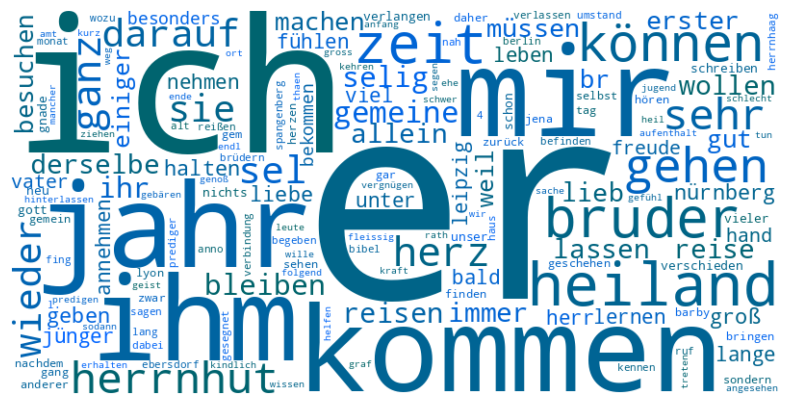

In [56]:
# Erstelle eine Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func = couleur).generate_from_frequencies(sorted_lemmata_freq)

# Zeige die Word Cloud an
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
# Verzeichnis, in dem sich die .txt-Dateien befinden
directory = 'w'

# Variable, um den gesamten Inhalt der Dateien zu speichern
corpora_w = ''

# Durchlaufe alle Dateien im angegebenen Verzeichnis
for filename in os.listdir(directory):
    # Prüfe, ob die Datei eine .txt-Datei ist
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        # Öffne die Datei und lese ihren Inhalt
        with open(file_path, 'r', encoding='utf-8') as file:
            corpora_w += file.read() + '\n'

In [58]:
# Verarbeite den bereinigten Text mit spaCy
doc = nlp(corpora_w)

In [59]:
# Extrahiere die Lemmata und filtere Stopwörter
lemmata = [token.lemma_.lower() for token in doc if token.lemma_.lower() not in stopwords]

In [60]:
lemmata_freq = Counter(lemmata)

In [61]:
# Behalte nur die Lemmata, die mehr als einmal vorkommen
filtered_lemmata_freq = {lemma: freq for lemma, freq in lemmata_freq.items() if freq > 3}

In [62]:
def couleur(*args, **kwargs):
    import random
    return "rgb(128, 0, {})".format(random.randint(100, 255))

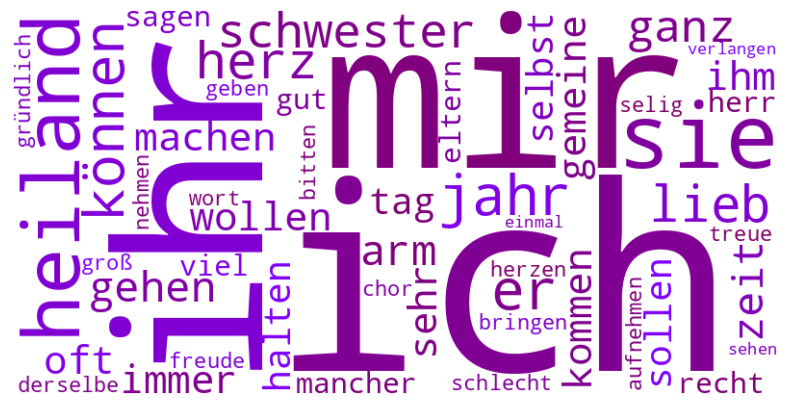

In [64]:
# Erstelle eine Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func = couleur).generate_from_frequencies(filtered_lemmata_freq)

# Zeige die Word Cloud an
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()